In [1]:
# Load the required libraries:
## For data manipulation
import pandas as pd
import numpy as np

## For data preprocesssing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

## For visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### For model train
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

## for model evaluation 
from sklearn.metrics import confusion_matrix, classification_report,roc_curve, auc, accuracy_score, recall_score,precision_score

from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB, GaussianNB



In [2]:
transactions= pd.read_csv("/Users/priyam/Documents/Assignments/DS_Analytics-in-Retail/Transactions.csv")
products = pd.read_csv("/Users/priyam/Documents/Assignments/DS_Analytics-in-Retail/prod_cat_info.csv")
customers = pd.read_csv("/Users/priyam/Documents/Assignments/DS_Analytics-in-Retail/Customer.csv")

In [3]:
transactions

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop


In [4]:
products

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [5]:
customers

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0
...,...,...,...,...
5642,274474,19-12-1992,M,2.0
5643,267666,24-12-1992,M,6.0
5644,270476,25-12-1992,F,3.0
5645,269626,27-12-1992,F,5.0


In [6]:
new_df1 = pd.merge(transactions, customers, how = 'left', left_on='cust_id' , right_on='customer_Id')

In [7]:
new_df1

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,271509,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,274550,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,270022,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,271020,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,270911,22-05-1970,M,2.0


In [8]:
new_df3 = pd.merge(new_df1, products, how ='left', left_on=['prod_subcat_code','prod_cat_code'], right_on =['prod_sub_cat_code','prod_cat_code'] )

In [9]:
new_df3

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,11-05-1973,F,8.0,Electronics,5,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,271509,08-06-1981,M,3.0,Home and kitchen,11,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,274550,21-02-1972,M,7.0,Books,12,Academic
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,270022,27-04-1984,M,9.0,Clothing,4,Mens
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,271020,20-06-1976,M,8.0,Home and kitchen,2,Furnishing
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,270911,22-05-1970,M,2.0,Books,11,Children


In [10]:
new_df2 = new_df3.T.drop_duplicates().T

In [11]:
new_df2

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,26-09-1981,M,5.0,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,11-05-1973,F,8.0,Electronics,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.11,-1748.11,TeleShop,27-07-1992,M,8.0,Books,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,08-06-1981,M,3.0,Home and kitchen,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.11,-1748.11,TeleShop,27-07-1992,M,8.0,Books,DIY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.72,1396.72,e-Shop,21-02-1972,M,7.0,Books,Academic
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,27-04-1984,M,9.0,Clothing,Mens
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.84,4649.84,MBR,20-06-1976,M,8.0,Home and kitchen,Furnishing
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.73,3785.73,TeleShop,22-05-1970,M,2.0,Books,Children


In [12]:
df = new_df2.drop_duplicates()

In [13]:
df

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,26-09-1981,M,5.0,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,11-05-1973,F,8.0,Electronics,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.11,-1748.11,TeleShop,27-07-1992,M,8.0,Books,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,08-06-1981,M,3.0,Home and kitchen,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.11,-1748.11,TeleShop,27-07-1992,M,8.0,Books,DIY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.72,1396.72,e-Shop,21-02-1972,M,7.0,Books,Academic
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,27-04-1984,M,9.0,Clothing,Mens
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.84,4649.84,MBR,20-06-1976,M,8.0,Home and kitchen,Furnishing
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.73,3785.73,TeleShop,22-05-1970,M,2.0,Books,Children


In [40]:
# df['tran_date'] = pd.to_datetime(df['tran_date'] )

In [15]:
print(df.isnull().sum())

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
DOB                 0
Gender              9
city_code           8
prod_cat            0
prod_subcat         0
dtype: int64


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23040 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    23040 non-null  object        
 1   cust_id           23040 non-null  object        
 2   tran_date         23040 non-null  datetime64[ns]
 3   prod_subcat_code  23040 non-null  object        
 4   prod_cat_code     23040 non-null  object        
 5   Qty               23040 non-null  object        
 6   Rate              23040 non-null  object        
 7   Tax               23040 non-null  object        
 8   total_amt         23040 non-null  object        
 9   Store_type        23040 non-null  object        
 10  DOB               23040 non-null  object        
 11  Gender            23031 non-null  object        
 12  city_code         23032 non-null  object        
 13  prod_cat          23040 non-null  object        
 14  prod_subcat       2304

In [17]:
df.describe(include='all')

/var/folders/zl/x1s6wx756x5gllq6bxg5dxbr0000gn/T/ipykernel_54698/2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
count,2.304000e+04,23040.0,23040,23040.0,23040.0,23040.0,23040.0,23040.00,23040.00,23040,23040,23031,23032.0,23040,23040
unique,2.087800e+04,5506.0,1129,12.0,6.0,10.0,2551.0,4194.00,5764.00,4,3987,2,10.0,6,18
top,3.226394e+10,268819.0,2011-07-13 00:00:00,4.0,5.0,5.0,552.0,64.26,676.26,e-Shop,17-09-1982,M,4.0,Books,Women
freq,4.000000e+00,13.0,35,4000.0,6066.0,4259.0,29.0,26.00,22.00,9304,32,11804,2422.0,6066,3046
first,NaN,NaN,2011-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2014-12-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_pos = df[(df['total_amt'] >= 0)]
df_neg = df[(df['total_amt'] < 0)]

In [19]:
M = df_pos['Gender'].value_counts()['M']
F = df_pos['Gender'].value_counts()['F']

In [20]:
#Percentage of clothing products bought by males and females

M_c = len(df_pos[(df_pos['Gender']=='M') & (df_pos['prod_cat']=='Clothing')])
F_c = len(df_pos[(df_pos['Gender']=='F') & (df_pos['prod_cat']=='Clothing')])


print("Percentage of clothing products bought by males : {:%}".format(M_c/M))
print("Percentage of clothing products bought by females : {:%}".format(F_c/F))

Percentage of clothing products bought by males : 12.957431%
Percentage of clothing products bought by females : 12.662466%


In [21]:
#Percentage of footwear products bought by males and females

M_f = len(df_pos[(df_pos['Gender']=='M') & (df_pos['prod_cat']=='Footwear')])
F_f = len(df_pos[(df_pos['Gender']=='F') & (df_pos['prod_cat']=='Footwear')])


print("Percentage of footwear products bought by males : {:%}".format(M_f/M))
print("Percentage of footwear products bought by females : {:%}".format(F_f/F))



Percentage of footwear products bought by males : 12.387976%
Percentage of footwear products bought by females : 13.588027%


In [22]:
#How many types of stores are there, and which type of stores sells maximum of products?

print("Number of types of stores are: {:d}".format(df_pos['Store_type'].nunique(dropna = True)))

d1= dict(df_pos.groupby('Store_type')['Store_type'].count())
max_store = list(d1.keys())[list(d1.values()).index(max(d1.values()))]

print("Store that sells the maximum of products is", max_store)

Number of types of stores are: 4
Store that sells the maximum of products is e-Shop


In [23]:
#Which type of book is selling the most?

#creating a dictionary with prod_cat as Books only
d2f= df_pos[(df_pos['prod_cat'] == 'Books')].groupby(['prod_subcat'])['prod_subcat'].count()
d2 = dict(d2f)

#Finding the sub category with maximum value and printing it
max_books = list(d2.keys())[list(d2.values()).index(max(d2.values()))]

print("Type of book selling the most is", max_books)


Type of book selling the most is Fiction


In [24]:
#What is the total amount spent by men on electronics?
Male_total = df_pos[(df_pos['Gender'] == 'M')]
Electronics_Male_total = Male_total[(Male_total['prod_cat'] == 'Electronics')].total_amt.sum()

print("Total amount spent by men on electronics is {:.2f}".format(Electronics_Male_total))

Total amount spent by men on electronics is 6315353.46


In [25]:
#What is the total amount spent by women on clothing?

Female_total = df_pos[(df_pos['Gender'] == 'F')]
Clothing_Female_total = Female_total[(Female_total['prod_cat'] == 'Clothing')].total_amt.sum()

print("Total amount spent by women on clothing is {:.2f}".format(Clothing_Female_total))

Total amount spent by women on clothing is 3446941.42


In [26]:
#What is the total amount spent on furnishings?

Furnishings_total = df_pos[(df_pos['prod_subcat'] == 'Furnishing')].total_amt.sum()

print("Total amount spent on furnishings is {:.2f}".format(Furnishings_total))

Total amount spent on furnishings is 2375375.40


In [27]:
#Who reads books more (Men/Women)?
Male_books = Male_total[(Male_total['prod_cat'] == 'Books')]
Female_books = Female_total[(Female_total['prod_cat'] == 'Books')]



if len(Male_books) == len(Female_books):
  print("Equal number of men and women read books")

elif  len(Male_books) > len(Female_books):
  print("Number of men reading books are more than women")

else:
  print("Number of women reading books are more than men")


Number of men reading books are more than women


In [28]:
#Which type of books men read more?



d3f= Male_books[(Male_books['prod_cat'] == 'Books')].groupby(['prod_subcat'])['prod_subcat'].count()
d3 = dict(d3f)

#Finding the sub category with maximum value and printing it
max_books_male = list(d3.keys())[list(d3.values()).index(max(d3.values()))]

print("Type of books men read more is", max_books_male)

Type of books men read more is Fiction


In [29]:
#Which type of books women read more?

d4f= Female_books[(Female_books['prod_cat'] == 'Books')].groupby(['prod_subcat'])['prod_subcat'].count()
d4 = dict(d4f)

#Finding the sub category with maximum value and printing it
max_books_female = list(d4.keys())[list(d4.values()).index(max(d4.values()))]

print("Type of books women read more is", max_books_female)

Type of books women read more is Academic


In [30]:
#Which electronic good is selling the most?

d5f= df_pos[(df_pos['prod_cat'] == 'Electronics')].groupby(['prod_subcat'])['prod_subcat'].count()
d5 = dict(d5f)

#Finding the sub category with maximum value and printing it
max_electronics = list(d5.keys())[list(d5.values()).index(max(d5.values()))]

print("Electronic good that is selling the most is ", max_electronics)

Electronic good that is selling the most is  Mobiles


In [31]:
#What is the total amount spent by customers between 1st January 2012 and 31st December 2012?

import dateutil.parser as parser
  
# Now parsing the "10-09-2021" datetime with
# dayfirst parameter
A = parser.parse("01-01-2012", dayfirst = True)
B = parser.parse("31-12-2012", dayfirst = True)

Dates_amount= df_pos[(df_pos['tran_date'] > A) & (df_pos['tran_date'] < B)].total_amt.sum()

print("Total amount spent by customers between 1st January 2012 and 31st December 2012 is {:.2f}".format(Dates_amount))

Total amount spent by customers between 1st January 2012 and 31st December 2012 is 17746080.11


In [32]:
#Calculate the following information using the merged data. Time period of the available transaction data.

time_period = max(df['tran_date']) - min(df['tran_date'])

print("Time period of the available transaction data is", time_period.days, "days.")

Time period of the available transaction data is 1430 days.


In [33]:
#Count of transactions where the total amount of transaction was negative.

print("Count of transactions where the total amount of transaction was negative is", len(df_neg) )

Count of transactions where the total amount of transaction was negative is 2164


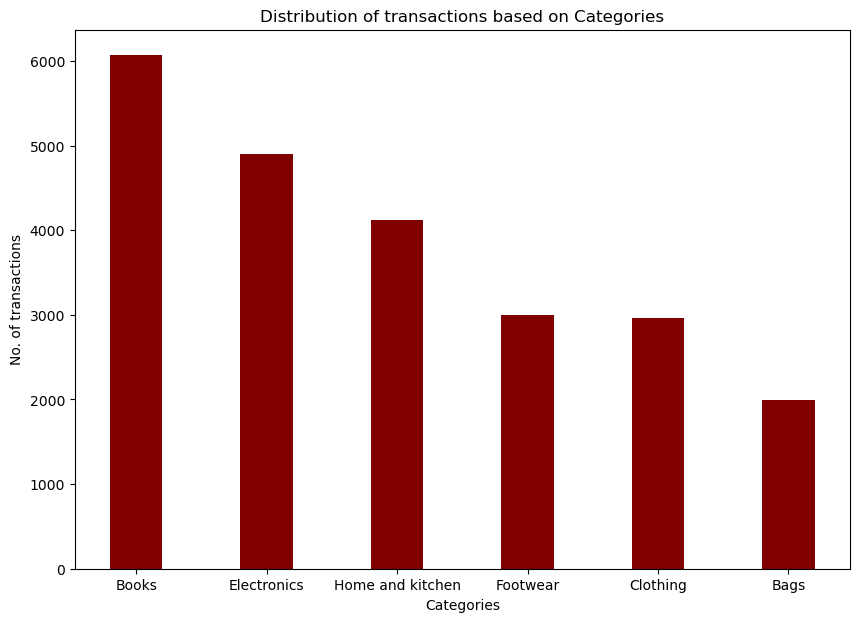

In [34]:
#Distribution of transactions based on Categories
d_cat = dict(df['prod_cat'].value_counts())
x1= list(d_cat.keys())
y1= list(d_cat.values())


fig = plt.figure(figsize =(10, 7))
plt.bar(x1, y1, color ='maroon',
        width = 0.4)
 
plt.xlabel("Categories")
plt.ylabel("No. of transactions")
plt.title("Distribution of transactions based on Categories")
plt.show()

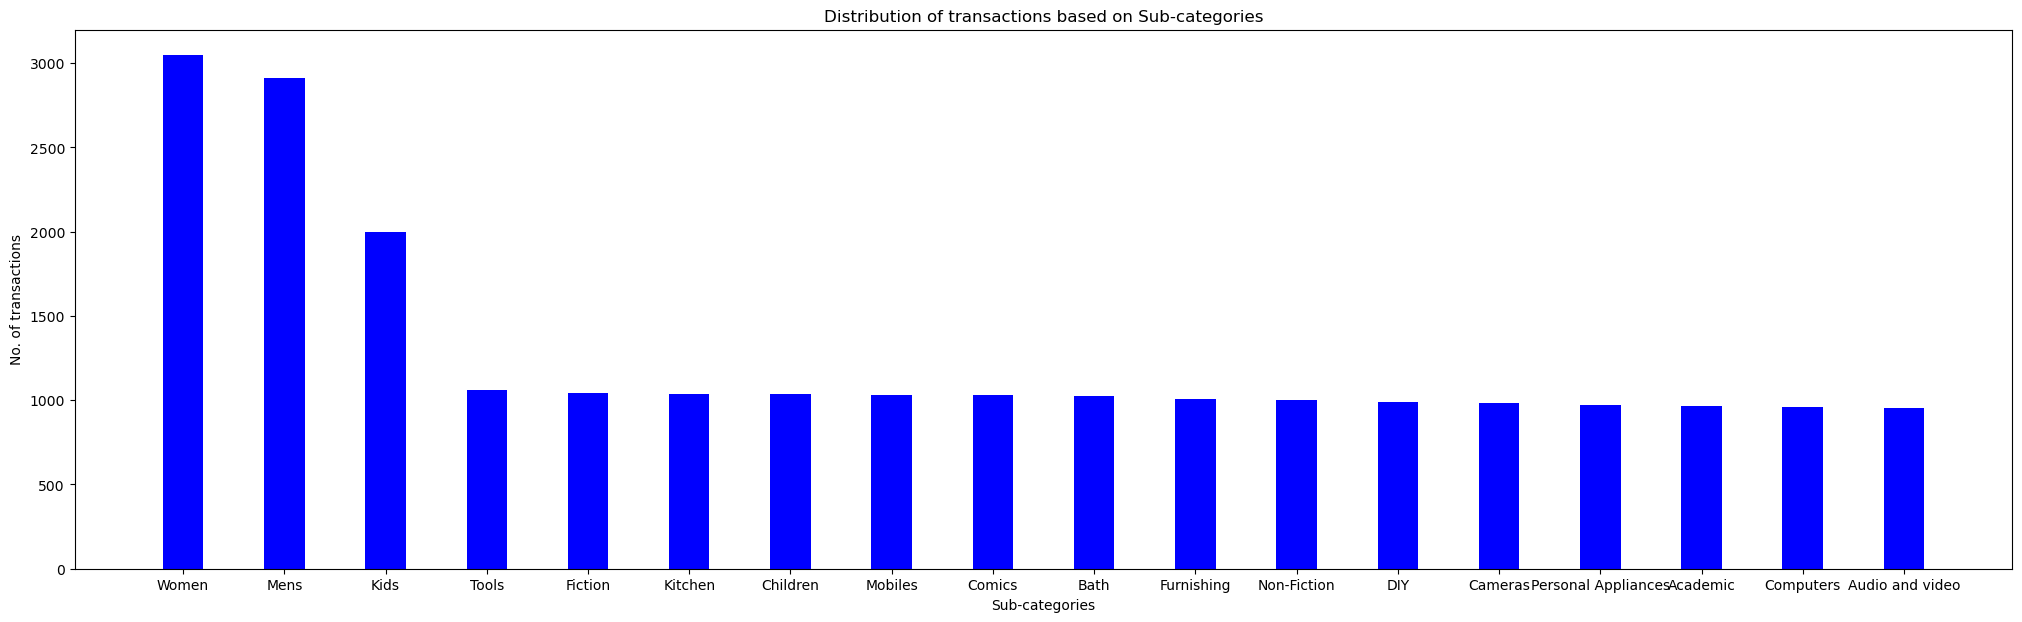

In [35]:
#Distribution of transactions based on Sub-categories
d_subcat = dict(df['prod_subcat'].value_counts())
x2= list(d_subcat.keys())
y2= list(d_subcat.values())

fig = plt.figure(figsize =(25, 7))
plt.bar(x2, y2, color ='blue',
        width = 0.4)


plt.xlabel("Sub-categories")
plt.ylabel("No. of transactions")
plt.title("Distribution of transactions based on Sub-categories")
plt.show()

In [36]:
df_pos

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
10,29258453508,270384,2014-02-20,5,3,5,1497,785.925,8270.925,e-Shop,11-05-1973,F,8.0,Electronics,Computers
11,25455265351,267750,2014-02-20,12,6,3,1360,428.4,4508.4,e-Shop,13-10-1986,M,1.0,Home and kitchen,Tools
12,1571002198,275023,2014-02-20,6,5,4,587,246.54,2594.54,e-Shop,09-03-1971,M,6.0,Books,DIY
14,36554696014,269345,2014-02-20,3,5,3,1253,394.695,4153.695,e-Shop,26-06-1970,F,10.0,Books,Comics
15,56814940239,268799,2014-02-20,7,5,5,368,193.2,2033.2,e-Shop,27-06-1979,M,9.0,Books,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.72,1396.72,e-Shop,21-02-1972,M,7.0,Books,Academic
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,27-04-1984,M,9.0,Clothing,Mens
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.84,4649.84,MBR,20-06-1976,M,8.0,Home and kitchen,Furnishing
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.73,3785.73,TeleShop,22-05-1970,M,2.0,Books,Children


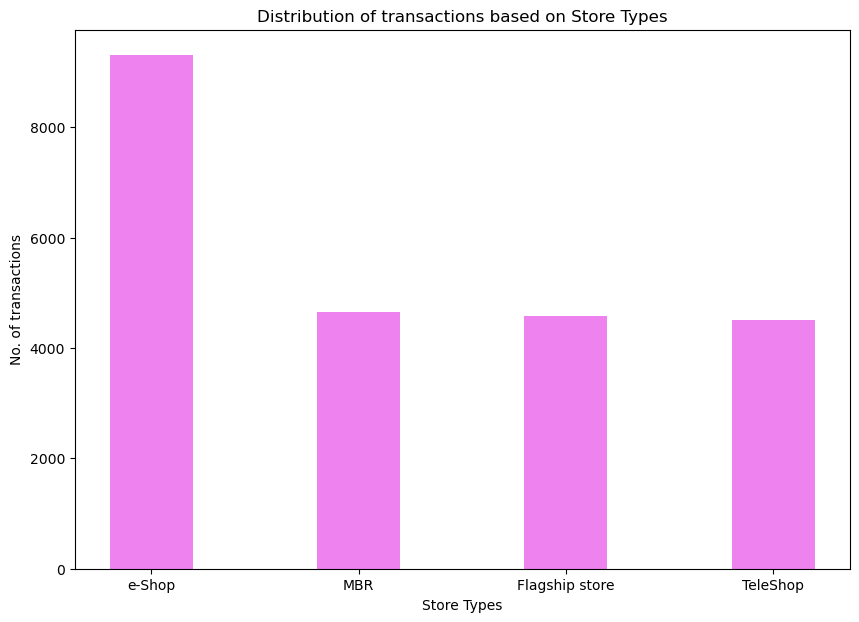

In [37]:

#Distribution of transactions based on store types
d_subcat = dict(df['Store_type'].value_counts())
x2= list(d_subcat.keys())
y2= list(d_subcat.values())

fig = plt.figure(figsize =(10, 7))
plt.bar(x2, y2, color ='violet',
        width = 0.4)


plt.xlabel("Store Types")
plt.ylabel("No. of transactions")
plt.title("Distribution of transactions based on Store Types")
plt.show()

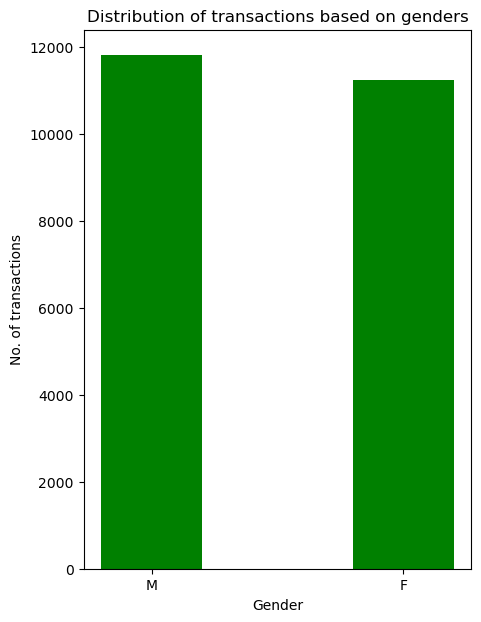

In [38]:
#Distribution of transactions based on gender
d_subcat = dict(df['Gender'].value_counts())
x2= list(d_subcat.keys())
y2= list(d_subcat.values())

fig = plt.figure(figsize =(5,7))
plt.bar(x2, y2, color ='green',
        width = 0.4)


plt.xlabel("Gender")
plt.ylabel("No. of transactions")
plt.title("Distribution of transactions based on genders")
plt.show()

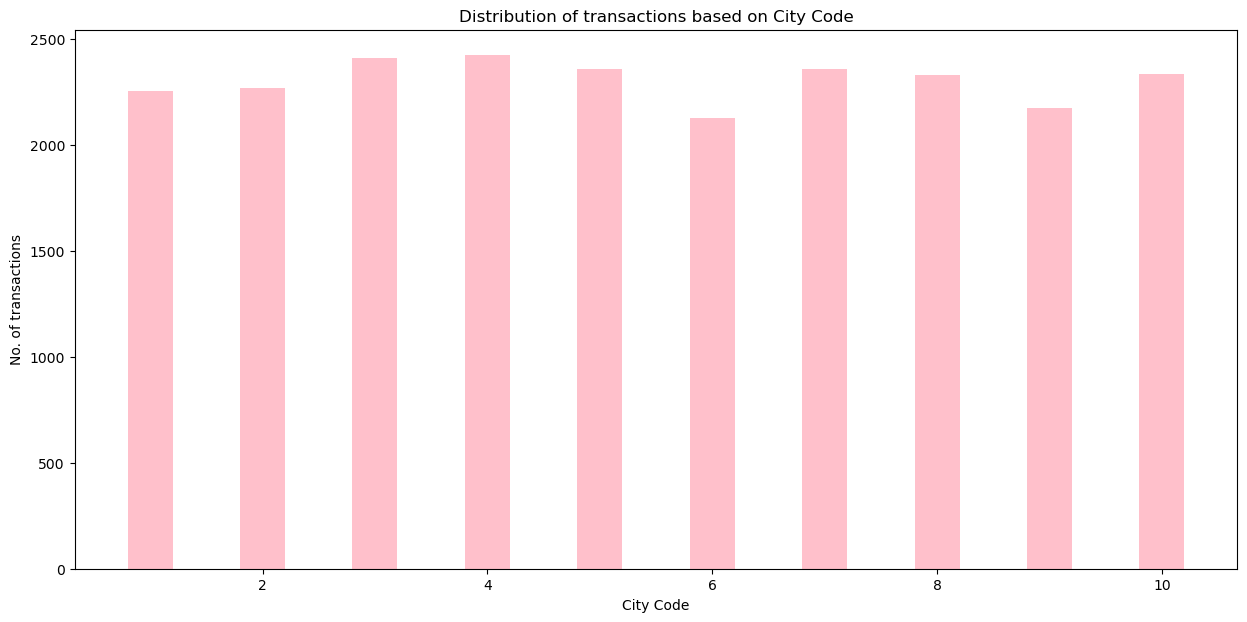

In [39]:
#Distribution of transactions based on gender
d_subcat = dict(df['city_code'].value_counts())
x2= list(d_subcat.keys())
y2= list(d_subcat.values())

fig = plt.figure(figsize =(15,7))
plt.bar(x2, y2, color ='pink',
        width = 0.4)


plt.xlabel("City Code")
plt.ylabel("No. of transactions")
plt.title("Distribution of transactions based on City Code")
plt.show()